In [1]:
import cv2
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

import random
#Script para leer y procesar imagen
sys.path.insert(0, '../Golden Master (AS IS)')
import readImage as rI
import preProcessing as pP
import indAnalysis as inA

sys.path.insert(0, '../Workflow de pruebas (AS IS)')
import processing as Pn

In [2]:
#Lee excel diluciones
anem_dil_excel = pd.ExcelFile("../data/CasosEspeciales.xlsx")
anem_dil_df = anem_dil_excel.parse('Anemia (Diluciones)')
anem_dil_df['QR'] = anem_dil_df['QR'].astype('str')
anem_dil_df.set_index('QR', inplace=True)
anem_dil_df.head()

,Dilución (Porcentaje),DIAG_TB,DIAG_HIV
QR,,,
699170900100001,60,N,N
699170900100002,60,N,N
699170900100003,50,N,N
699170900100004,50,N,N
699170900100005,40,N,N


In [3]:
batch = True
markerNames = ['ESAT6' , 'CFP10', 'RV1681', 'P24', 'Ctrl1', 'Ctrl2']
qrs = anem_dil_df.index
listXMStats = []
for qr in qrs:
    images = rI.readImage(qr, array = True)
    imageLocal = rI.readImage(qr, local= True, ext = 'jpg')
    if(isinstance(imageLocal, (list, tuple, np.ndarray))):
        images.append(imageLocal)
    for img in images:
        markers = inA.resizeAll(Pn.cropXMarkers(img))
        if( not isinstance(markers, str)):
                for i,m in enumerate(markers):
                    statsXMarker = inA.grayControlStats(m) #Dict 
                    statsXMarker.update(inA.controlStats(m)) #Dict 
                    statsXMarker['marker'] = markerNames[i]
                    statsXMarker['qr'] = qr
                    listXMStats.append(statsXMarker)
                    m = inA.andOperation(m , inA.readMask(url = "../../Imagenes/mask3.png", 
                                                          size = 90))
                    if (not batch):
                        plt.subplot(321 + i),plt.imshow(cv2.cvtColor(m,cv2.COLOR_BGR2RGB))
                if (not batch):
                    plt.show()
        else: 
            print(markers)
            
marker_stats_df = pd.DataFrame(listXMStats)
marker_stats_df['QR'] = marker_stats_df['qr'].astype('str')
marker_stats_df.set_index('QR', inplace=True)
print('Rows: ' + str(len(marker_stats_df)))

marker_stats_df.head()

Error finding individual tests!
Rows: 1434


,G_25_percentile,G_mean,G_median,G_std,H_25_percentile,H_mean,H_median,H_std,S_25_percentile,S_mean,S_median,S_std,V_25_percentile,V_mean,V_median,V_std,marker,qr
QR,,,,,,,,,,,,,,,,,,
699170900100001,52.0,73.339473,71.0,25.388251,94.0,99.591254,98.0,13.287590,20.0,31.803279,30.0,12.647875,215.0,235.572716,255.0,32.565979,ESAT6,699170900100001
699170900100001,52.0,75.755546,72.0,27.566011,97.0,100.419896,99.0,11.446538,20.0,30.133813,28.0,11.600022,214.0,234.862840,255.0,34.078128,CFP10,699170900100001
699170900100001,48.0,71.218920,69.0,27.006817,92.0,95.023868,94.0,10.053046,28.0,42.751073,44.0,16.959340,219.0,236.592222,255.0,31.241149,RV1681,699170900100001
699170900100001,48.0,71.411469,68.0,27.557258,91.0,95.285786,95.0,10.741522,28.0,41.945188,41.0,16.728082,219.0,236.586914,255.0,31.296751,P24,699170900100001
699170900100001,47.0,74.293010,70.0,35.019608,90.0,93.096939,93.0,8.914320,27.0,43.806353,46.0,17.714832,220.0,235.592346,255.0,35.093779,Ctrl1,699170900100001


In [4]:
#Join marker_stats con anem_dil
marker_anem_dil = anem_dil_df.join(marker_stats_df, how='inner')
marker_anem_dil

,Dilución (Porcentaje),DIAG_TB,DIAG_HIV,G_25_percentile,G_mean,G_median,G_std,H_25_percentile,H_mean,H_median,...,S_25_percentile,S_mean,S_median,S_std,V_25_percentile,V_mean,V_median,V_std,marker,qr
QR,,,,,,,,,,,,,,,,,,,,,
699170900100001,60,N,N,52.0,73.339473,71.0,25.388251,94.0,99.591254,98.0,...,20.00,31.803279,30.0,12.647875,215.00,235.572716,255.0,32.565979,ESAT6,699170900100001
699170900100001,60,N,N,52.0,75.755546,72.0,27.566011,97.0,100.419896,99.0,...,20.00,30.133813,28.0,11.600022,214.00,234.862840,255.0,34.078128,CFP10,699170900100001
699170900100001,60,N,N,48.0,71.218920,69.0,27.006817,92.0,95.023868,94.0,...,28.00,42.751073,44.0,16.959340,219.00,236.592222,255.0,31.241149,RV1681,699170900100001
699170900100001,60,N,N,48.0,71.411469,68.0,27.557258,91.0,95.285786,95.0,...,28.00,41.945188,41.0,16.728082,219.00,236.586914,255.0,31.296751,P24,699170900100001
699170900100001,60,N,N,47.0,74.293010,70.0,35.019608,90.0,93.096939,93.0,...,27.00,43.806353,46.0,17.714832,220.00,235.592346,255.0,35.093779,Ctrl1,699170900100001
699170900100001,60,N,N,45.0,68.314357,67.0,26.495685,89.0,92.151781,92.0,...,27.00,42.921557,43.0,17.289795,220.00,237.282099,255.0,30.134371,Ctrl2,699170900100001
699170900100001,60,N,N,60.0,79.192968,75.0,23.527475,103.0,118.989664,126.0,...,22.00,31.804569,30.5,12.385716,217.00,234.841605,255.0,34.555577,ESAT6,699170900100001
699170900100001,60,N,N,61.0,82.131017,78.0,25.833773,87.0,116.650485,126.0,...,22.00,32.444105,31.0,12.652446,217.00,233.946173,255.0,36.355865,CFP10,699170900100001
699170900100001,60,N,N,57.0,78.494768,75.0,25.505203,89.0,98.998022,97.0,...,20.00,28.134085,26.0,10.899556,217.00,234.304938,255.0,35.357422,RV1681,699170900100001


In [5]:
marker_anem_dil['Dilución (Porcentaje)'].value_counts()

10    144
60    114
30    108
40     96
56     90
50     84
33     84
20     84
13     84
53     78
46     78
43     78
36     78
26     78
23     78
16     78
Name: Dilución (Porcentaje), dtype: int64

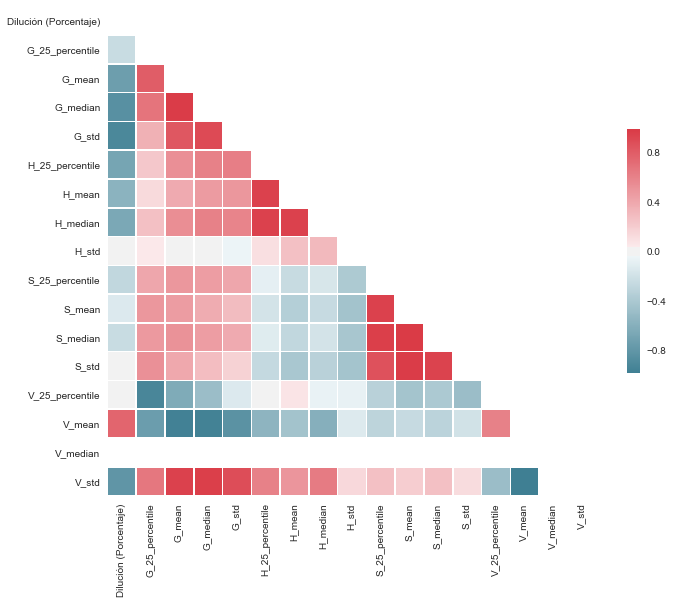

In [6]:
##Correlation matrix
sns.set(style="white")
corr = marker_anem_dil.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

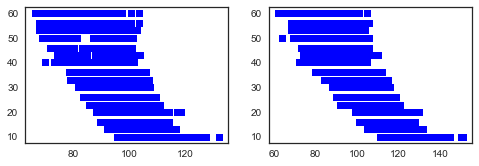

In [7]:
#Grafica dilución vs distintos parámetros
plt.subplot(221)
plt.plot(marker_anem_dil['G_mean'], marker_anem_dil['Dilución (Porcentaje)'], 'bs')
plt.subplot(222)
plt.plot(marker_anem_dil['G_median'], marker_anem_dil['Dilución (Porcentaje)'], 'bs')
plt.show()

In [8]:
### Train and Test dataframes
# Split the data into training/testing sets
train, test = train_test_split(marker_anem_dil, test_size=0.2)

features = ['H_mean','V_mean','G_median','G_mean','G_std']
anem_X_train = train[features]
anem_T_train = train[['Dilución (Porcentaje)']]

#Normalization
scaler = preprocessing.StandardScaler().fit(anem_X_train)
anem_X_train = scaler.transform(anem_X_train) #Scaled

print(scaler.mean_)
print(scaler.std_)
anem_X_test = scaler.transform(test[features])
anem_T_test = test[['Dilución (Porcentaje)']]

[ 102.80000089  231.70875015  100.23278117   94.25292674   38.44468531]
[  5.68757566   3.38301229  17.72289481  12.75525332   5.78416456]


/Users/rodolfo.melin/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function std_ is deprecated; Attribute ``std_`` will be removed in 0.19. Use ``scale_`` instead
  warnings.warn(msg, category=DeprecationWarning)


### Linear Model
'H_median','H_mean','H_25_percentile','V_mean'
Mean squared error: 70.67 
Variance score: 0.67

'H_median','H_mean','V_mean'
Mean squared error: 60.05
Variance score: 0.73

Normalization: Mean squared error: 48.29
Variance score: 0.81

Gray 'G_median','G_mean','G_std'
Mean squared error: 28.40
Variance score: 0.90

*More examples 240
Mean squared error: 21.64
Variance score: 0.91

*Wet Examples 306
Mean squared error: 33.88
Variance score: 0.87

*Samples 492
Mean squared error: 23.98
Variance score: 0.92

*Samples 720
Mean squared error: 18.91
Variance score: 0.92

In [9]:
#Linear Model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(anem_X_train, anem_T_train)

# Make predictions using the testing set
anem_T_pred = regr.predict(anem_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(anem_T_test, anem_T_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(anem_T_test, anem_T_pred))

test['Prediction'] = anem_T_pred
test[['Dilución (Porcentaje)', 'Prediction']].head()

Coefficients: 
 [[ -0.90289829  -0.86118091 -30.1001756   22.63101286  -6.88396537]]
Intercept: 
 [ 33.9206626]
Mean squared error: 22.01
Variance score: 0.91


/Users/rodolfo.melin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Dilución (Porcentaje),Prediction
QR,,
699170900100039,23,27.506381
699170900100017,46,46.317281
699170900100026,16,16.786537
699170900100006,40,41.335591
699170900100018,43,45.871237


### Bayesian Model

Mean squared error: 57.19
Variance score: 0.79

Normalization    Mean squared error: 47.69
Variance score: 0.81

Gray 'G_median','G_mean','G_std'
Mean squared error: 28.81
Variance score: 0.90

*More examples 240
Mean squared error: 21.81
Variance score: 0.91

*Wet Examples 306
Mean squared error: 33.95
Variance score: 0.87

*Samples 492
Mean squared error: 24.00
Variance score: 0.92

*Samples 492
Mean squared error: 18.87
Variance score: 0.92

In [10]:
regr = linear_model.BayesianRidge()

# Train the model using the training sets
regr.fit(anem_X_train, anem_T_train)

# Make predictions using the testing set
anem_T_pred = regr.predict(anem_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(anem_T_test, anem_T_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(anem_T_test, anem_T_pred))

test['Prediction'] = anem_T_pred
test[['Dilución (Porcentaje)', 'Prediction']].head()

Coefficients: 
 [ -0.9127938   -0.86921735 -29.96417529  22.51619167  -6.91136715]


/Users/rodolfo.melin/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean squared error: 22.01
Variance score: 0.91


/Users/rodolfo.melin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Dilución (Porcentaje),Prediction
QR,,
699170900100039,23,27.483888
699170900100017,46,46.301053
699170900100026,16,16.780391
699170900100006,40,41.354045
699170900100018,43,45.887341


### Random Forest
Mean squared error: 57.85
Variance score: 0.76

Normalization Mean squared error: 71.95
Variance score: 0.71

Gray 'G_median','G_mean','G_std'
Mean squared error: 76.90
Variance score: 0.72

In [11]:
regr = RandomForestRegressor(max_depth=2, random_state=0)

# Train the model using the training sets
regr.fit(anem_X_train, anem_T_train)

# Make predictions using the testing set
anem_T_pred = regr.predict(anem_X_test)

# The coefficients
print('Feature importances: \n', regr.feature_importances_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(anem_T_test, anem_T_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(anem_T_test, anem_T_pred))

test['Prediction'] = anem_T_pred
test[['Dilución (Porcentaje)', 'Prediction']].head()

Feature importances: 
 [ 0.          0.          0.00277792  0.          0.99722208]
Mean squared error: 45.51
Variance score: 0.81


/Users/rodolfo.melin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/rodolfo.melin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Dilución (Porcentaje),Prediction
QR,,
699170900100039,23,14.321810
699170900100017,46,50.051510
699170900100026,16,14.321810
699170900100006,40,47.258115
699170900100018,43,50.857603


### Neural Network
'H_median','H_mean','V_mean','G_median','G_mean','G_std'
alpha=1e-5, hidden_layer_sizes=(5, 3)
Mean squared error: 14.02
Variance score: 0.94

*More examples 240
Mean squared error: 12.81
Variance score: 0.94

*Wet Examples 306
Mean squared error: 19.24
Variance score: 0.93

*Examples 492
Mean squared error: 13.25
Variance score: 0.96

*Samples 492
Mean squared error: 14.14
Variance score: 0.94

*Samples 882
regr = MLPRegressor(solver='lbfgs', alpha=1e-5, 
                    hidden_layer_sizes=(3, 1), random_state=1, activation = 'tanh')
Mean squared error: 12.37
Variance score: 0.96 

*Samples 882
regr = MLPRegressor(solver='lbfgs', alpha=1e-5, 
                    hidden_layer_sizes=(3, 1), random_state=1, activation = 'logistic')
Mean squared error: 10.56
Variance score: 0.96                    

In [12]:
regr = MLPRegressor(solver='lbfgs', alpha=1e-3, 
                    hidden_layer_sizes=(3, 1), random_state=1, activation = 'logistic')

# Train the model using the training sets
regr.fit(anem_X_train, anem_T_train)

# Make predictions using the testing set
anem_T_pred = regr.predict(anem_X_test)

# The coefficients
print('Coeficientes: \n', regr.coefs_)
print('Intercepts: \n', regr.intercepts_)
print('N Layers: \n', regr.n_layers_)
print('Activation Output: \n', regr.out_activation_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(anem_T_test, anem_T_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(anem_T_test, anem_T_pred))

test['Prediction'] = anem_T_pred
test[['Dilución (Porcentaje)', 'Prediction']]

/Users/rodolfo.melin/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Coeficientes: 
 [array([[-1.24136651,  0.02323243, -0.17391214],
       [-0.82310506, -0.46745953,  1.05733552],
       [-3.09126768,  1.43402573, -8.40228374],
       [ 4.51942453, -1.51952793,  6.99478687],
       [-6.65639653,  0.46553719, -0.54589522]]), array([[ 0.72561999],
       [-8.32347723],
       [ 7.37132416]]), array([[ 50.71585719]])]
Intercepts: 
 [array([-4.70367609, -1.61688244, -5.52574534]), array([ 1.13640248]), array([ 8.04524884])]
N Layers: 
 4
Activation Output: 
 identity
Mean squared error: 15.00
Variance score: 0.94


/Users/rodolfo.melin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Dilución (Porcentaje),Prediction
QR,,
699170900100039,23,24.546189
699170900100017,46,48.686115
699170900100026,16,14.821361
699170900100006,40,37.742846
699170900100018,43,46.270545
699170900100016,50,48.685161
699170900100014,56,52.441822
699170900100041,33,32.549801
699170900100038,43,41.322170


In [13]:
#Write NN txt file
f = open("../data/anem_ann_freeze.txt", "w")
f.close()
f = open("../data/anem_ann_freeze.txt", "a")
for w in regr.coefs_:
    description = "W," + str(len(w)) + "," + str(len(w[0]))
    f.write(description + "\n")
    f.write(str(w).replace("[","").replace("]","") + "\n")
for b in regr.intercepts_:
    description = "b," + str(len(b))
    f.write(description + "\n")
    f.write(str(b).replace("[","").replace("]","") + "\n")
f.close()

### Make predictions validation set

In [14]:
#Load NN txt file

In [15]:
##Load excel of Validation

anem_dil_validation_df = anem_dil_excel.parse('SZ2')
anem_dil_validation_df['QR'] = anem_dil_validation_df['QR'].astype('str')
anem_dil_validation_df.set_index('QR', inplace=True)
anem_dil_validation_df.head()

""
QR
6991711001000340
6991711001000341
6991711001000350
6991711001000351
6991711002000240


In [16]:
#Crop images for each qr code
#Get dictionary of measures
batch = True
markerNames = ['ESAT6' , 'CFP10', 'RV1681', 'P24', 'Ctrl1', 'Ctrl2']
qrs = anem_dil_validation_df.index
listXMStats = []
j = 0
for qr in qrs:
    
    #images = rI.readImage(qr, array = True)
    images = []
    imageLocal = rI.readImage(qr, local= True, ext = 'png')
    if(isinstance(imageLocal, (list, tuple, np.ndarray))):
        images.append(imageLocal)
        
    for img in images:
        markers = inA.resizeAll(Pn.cropXMarkers(img))
        if( not isinstance(markers, str)):
                for i,m in enumerate(markers):
                    statsXMarker = inA.grayControlStats(m) #Dict 
                    statsXMarker.update(inA.controlStats(m)) #Dict 
                    statsXMarker['marker'] = markerNames[i]
                    statsXMarker['qr'] = qr
                    listXMStats.append(statsXMarker)
                    m = inA.andOperation(m , inA.readMask(url = "../../Imagenes/mask3.png", 
                                                          size = 90))
                    if (not batch):
                        plt.subplot(321 + i),plt.imshow(cv2.cvtColor(m,cv2.COLOR_BGR2RGB))
                if (not batch):
                    plt.show()
        else: 
            print(markers)
            
marker_stats_df_val = pd.DataFrame(listXMStats)
marker_stats_df_val['QR'] = marker_stats_df_val['qr'].astype('str')
marker_stats_df_val.set_index('QR', inplace=True)
print('Rows: ' + str(len(marker_stats_df_val)))

marker_stats_df_val.head()

Rows: 36


,G_25_percentile,G_mean,G_median,G_std,H_25_percentile,H_mean,H_median,H_std,S_25_percentile,S_mean,S_median,S_std,V_25_percentile,V_mean,V_median,V_std,marker,qr
QR,,,,,,,,,,,,,,,,,,
6991711001000340,67.0,102.213060,113.0,40.215985,96.0,99.893221,99.0,8.644028,36.0,59.823972,62.0,26.625935,215.0,229.085802,255.0,44.434573,ESAT6,6991711001000340
6991711001000340,65.0,99.722478,111.0,39.532381,96.0,99.547609,98.0,9.516511,39.0,64.253570,67.0,28.464222,217.0,230.137654,255.0,42.830538,CFP10,6991711001000340
6991711001000340,63.0,103.768104,115.0,43.916353,95.0,98.468410,98.0,7.514618,35.0,58.550278,61.0,25.382946,217.0,228.197407,255.0,46.645778,RV1681,6991711001000340
6991711001000340,64.0,99.938049,112.0,40.819498,94.0,95.360515,96.0,6.165081,40.0,69.249636,73.0,31.884579,218.0,229.965802,255.0,43.325996,P24,6991711001000340
6991711001000340,60.0,95.190277,107.0,38.600994,95.0,97.119693,97.0,7.634056,38.0,59.338864,63.0,24.646435,221.0,231.010494,255.0,41.529288,Ctrl1,6991711001000340


In [17]:
#Join validation and markers
df_val = marker_stats_df_val.join(anem_dil_validation_df, how='inner')
df_val

,G_25_percentile,G_mean,G_median,G_std,H_25_percentile,H_mean,H_median,H_std,S_25_percentile,S_mean,S_median,S_std,V_25_percentile,V_mean,V_median,V_std,marker,qr
QR,,,,,,,,,,,,,,,,,,
6991711001000340,67.00,102.213060,113.0,40.215985,96.0,99.893221,99.0,8.644028,36.00,59.823972,62.0,26.625935,215.00,229.085802,255.0,44.434573,ESAT6,6991711001000340
6991711001000340,65.00,99.722478,111.0,39.532381,96.0,99.547609,98.0,9.516511,39.00,64.253570,67.0,28.464222,217.00,230.137654,255.0,42.830538,CFP10,6991711001000340
6991711001000340,63.00,103.768104,115.0,43.916353,95.0,98.468410,98.0,7.514618,35.00,58.550278,61.0,25.382946,217.00,228.197407,255.0,46.645778,RV1681,6991711001000340
6991711001000340,64.00,99.938049,112.0,40.819498,94.0,95.360515,96.0,6.165081,40.00,69.249636,73.0,31.884579,218.00,229.965802,255.0,43.325996,P24,6991711001000340
6991711001000340,60.00,95.190277,107.0,38.600994,95.0,97.119693,97.0,7.634056,38.00,59.338864,63.0,24.646435,221.00,231.010494,255.0,41.529288,Ctrl1,6991711001000340
6991711001000340,57.00,91.036104,102.0,37.271616,94.0,96.631767,96.0,7.089960,37.00,60.842001,66.0,25.732658,222.00,232.316790,255.0,39.262861,Ctrl2,6991711001000340
6991711001000341,63.00,97.199247,107.0,38.770769,98.0,102.571186,102.0,9.941741,40.00,63.294774,68.0,27.118001,218.00,231.549012,255.0,40.318803,ESAT6,6991711001000341
6991711001000341,63.00,96.570950,106.0,38.495716,96.0,98.281894,99.0,8.993001,41.00,66.885023,71.0,29.275293,217.00,231.540494,255.0,40.251830,CFP10,6991711001000341
6991711001000341,61.00,102.294931,114.0,44.197904,96.0,99.224003,99.0,8.204788,38.75,63.047642,68.0,27.333101,219.75,229.484074,255.0,44.732601,RV1681,6991711001000341


In [18]:
#Make predictions using some regr model

anem_X_val = scaler.transform(df_val[features])
#anem_T_val = df_val[['Dilución (Porcentaje)']]

# Make predictions using validation set
anem_T_pred = regr.predict(anem_X_val)

'''
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(anem_T_val, anem_T_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(anem_T_val, anem_T_pred))
'''

df_val['Prediction'] = anem_T_pred
df_val[['marker', 'Prediction']].to_csv("../data/AnemPredictionSZ2.csv")
df_val[['marker', 'Prediction']].head()

,marker,Prediction
QR,,
6991711001000340,ESAT6,21.376264
6991711001000340,CFP10,22.445255
6991711001000340,RV1681,15.737351
6991711001000340,P24,19.818106
6991711001000340,Ctrl1,22.306323


In [19]:
df_val_std = df_val[['Prediction']].groupby('QR').agg('std')
df_val_std.columns = ['Prediction (STD)']
df_val_std.head()
df_val_std.to_csv("../data/STDAnemPredictionSZ2.csv")